# Linear Regression

In [74]:
import numpy as np
import matplotlib.pyplot as plt

In [75]:
X = 2 * np.random.rand(100,1) #Uniform distribution
Y = 3 + 3 * X + 0.9*np.random.randn(100,1) #Gaussian distribution

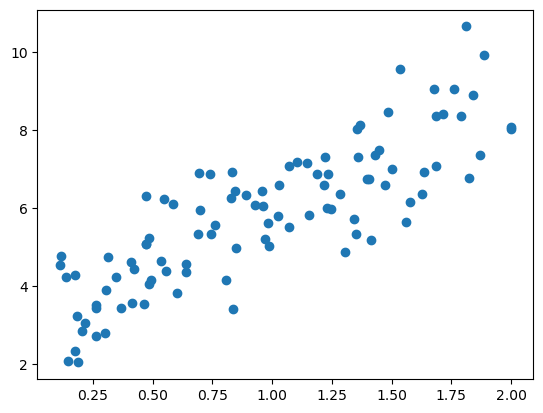

In [76]:
plt.scatter(X,Y)

In [77]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance

In [78]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)

In [79]:
theta_best

array([[3.13274868],
       [2.80557632]])

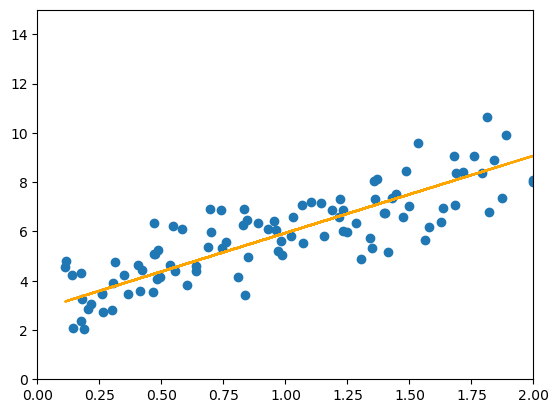

In [80]:
a,b = theta_best[0,0],theta_best[1,0]
plt.plot(X, a*X + b, color='orange')
plt.scatter(X,Y)
plt.axis([0, 2, 0, 15])
plt.show()

In [81]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,Y)
lin_reg.intercept_, lin_reg.coef_
X_new = [[2.5]]
lin_reg.predict(X_new)

array([[10.14668948]])

# Gradient Descent 

## Batch Gradient Descent

In [93]:
etas = [0.01, 0.1, 0.4] # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization (normal distribution, mean =0, std = 1)

In [94]:
theta

array([[-1.03114014],
       [ 0.3171047 ]])

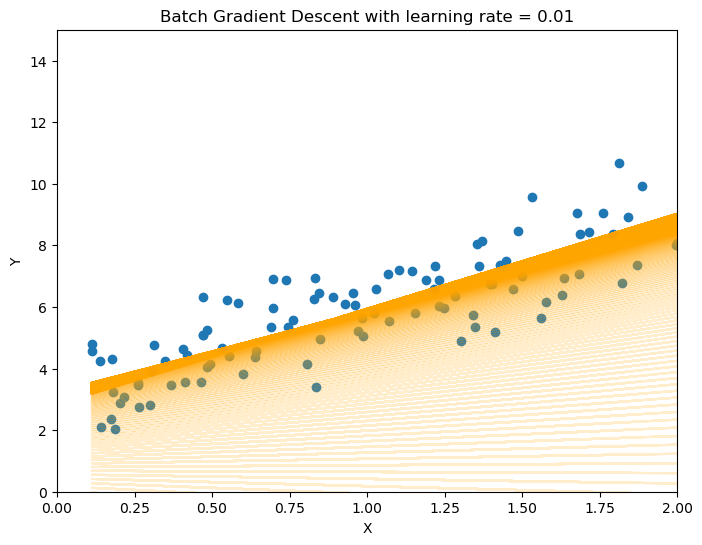

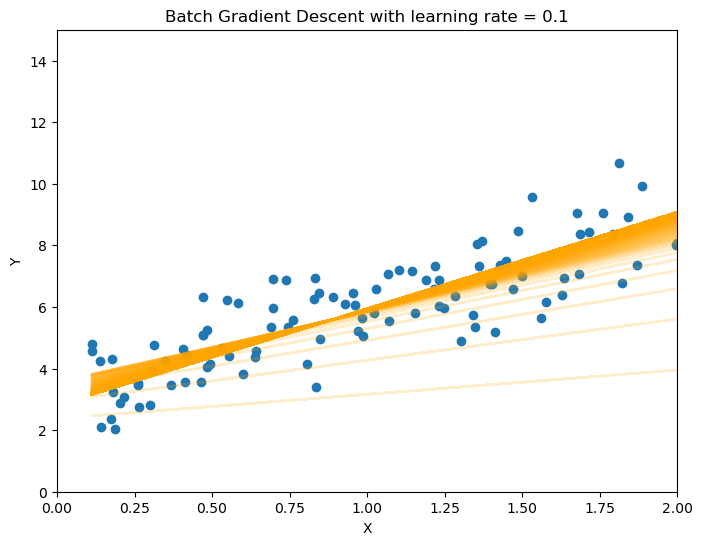

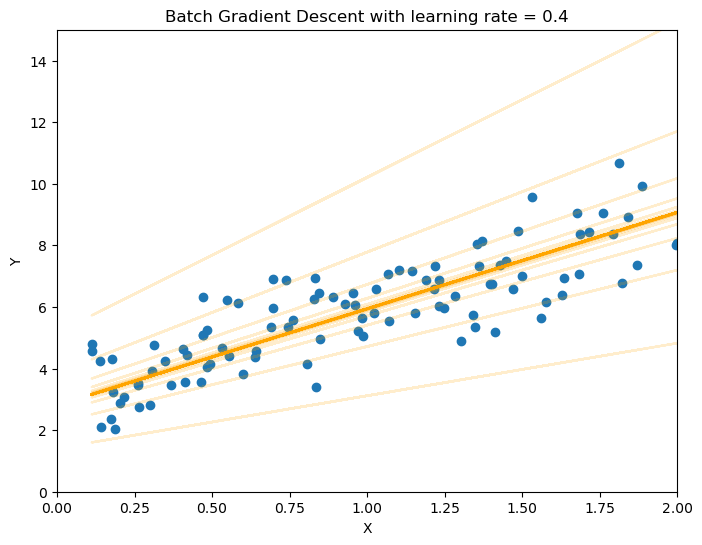

In [96]:
for eta in etas:
    plt.figure(figsize=(8, 6))
    plt.scatter(X,Y)
    plt.axis([0, 2, 0, 15])
    theta = np.random.randn(2,1)
    for iteration in range(n_iterations):
        eta_string = 'eta'
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - Y)
        theta = theta - eta * gradients
        plt.plot(X, theta[0]*X + theta[1], color = 'orange', alpha = 0.2)
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(f'Batch Gradient Descent with learning rate = {eta}')

In [97]:
print(theta, abs(theta-theta_best)) # Both methods lead to the same result

[[3.13274868]
 [2.80557632]] [[7.10542736e-15]
 [3.99680289e-15]]


## Stochastic Gradient Descent

In [111]:
n_epochs = 1000
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)
theta_stochastic = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = Y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta_stochastic) - yi)
        eta = learning_schedule(epoch * m + i)
        theta_stochastic = theta_stochastic - eta * gradients

In [112]:
theta_stochastic - theta_best

array([[-0.00605217],
       [ 0.01360245]])

Using ScikitLearn:

In [115]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-4, penalty=None, eta0=0.1)
sgd_reg.fit(X, Y.ravel())
[sgd_reg.intercept_, sgd_reg.coef_] - theta_best

array([[-0.06247903],
       [ 0.01469169]])